# PART 3.2 - Model Result Comparison

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt


In [27]:
def scatter_plot(y_pred, y_true):
    """Scatter plot of the predictions vs true values."""
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred, label='Predictions')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Predictions')
    plt.title('Predictions vs True Values')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.legend()
    plt.grid()
    plt.show()

In [28]:
# Load the data
X_train = pd.read_csv('./data/X_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_train = pd.read_csv('./data/y_train.csv')
y_test = pd.read_csv('./data/y_test.csv')

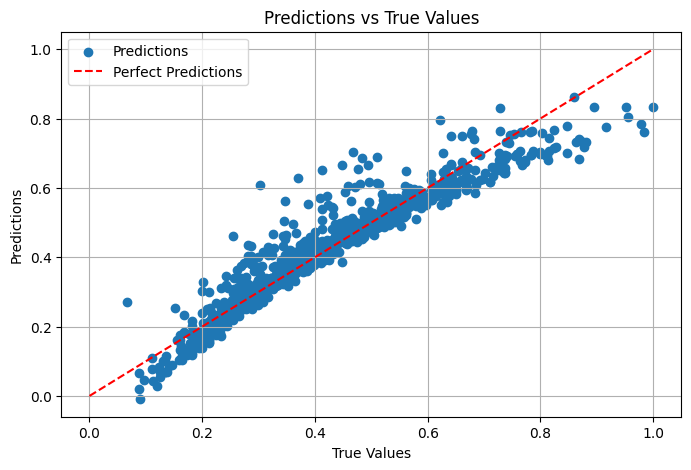

Mean Squared Error: 0.0030838378256294345
Mean Absolute Error: 0.03692209958039596
Mean Absolute Percentage Error: 10.6572%
R^2 Score: 0.8995533145403526


In [41]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate the R^2 score of the model
score = model.score(X_test, y_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

# Plot the predictions
scatter_plot(predictions, y_test)

print("===========================================================")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape * 100:.4f}%')
print(f'R^2 Score: {score}')
print("===========================================================")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


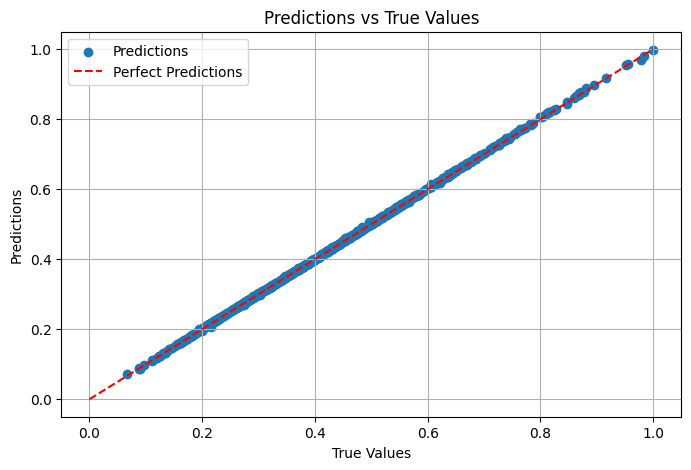

Mean Squared Error: 4.222949819042328e-06
Mean Absolute Error: 0.001453266391768972
Mean Absolute Percentage Error: 0.3831%


In [ ]:
# Create the neural network model
model = models.Sequential([
    Input(shape=(X_train.shape[1],)), 
    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1)
])

#optimizer = SGD(learning_rate=0.026, momentum=0.84)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])

# Train the model
history = model.fit(X_train, y_train, epochs=190, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions and plot them
predictions = model.predict(X_test)
scatter_plot(predictions, y_test)

test_mse = mean_squared_error(y_test, predictions)
test_mae = mean_absolute_error(y_test, predictions)
test_mape = mean_absolute_percentage_error(y_test, predictions)


print("===========================================================")
print(f'Mean Squared Error: {test_mse}')
print(f'Mean Absolute Error: {test_mae}')
print(f'Mean Absolute Percentage Error: {test_mape * 100:.4f}%')
print("===========================================================")
